# Mean or median imputation

**Definition**
- Fill missing values in a variable with the mean or median of the distribution
- If the variable is normally distributed, the mean and median are approximately the same. If the data is skewed, the median is a better representation of frequent data. 

**Assumption**
- Data is missing at random 
- Missing observations most likely look like the majority of the observation (mean, median)

**Advantage**
- Quick and easy to implement

**Limitation**
- The distribution can be distorted after imputation (variance, covariance)

**When to use** 
- Data is missing at random 
- Missing data is no more than 5% of the data set
- A common practice is using mean/median imputation, and having an additional variable called "missing indicator". This way if data is not missing at random, the missing indicator variable would capture the non-random behavior.

# Load data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression


In [2]:
cols_to_import = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
                  'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']

# variables (predictors)
cols = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
       'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
    
df = pd.read_csv('../data/house_price/train.csv', usecols=cols_to_import)

In [3]:
df

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000
...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,0.0,953,953,953,1647,1999.0,0,175000
1456,85.0,6,119.0,589,1542,2073,2073,1978.0,349,210000
1457,66.0,7,0.0,877,1152,1188,2340,1941.0,0,266500
1458,68.0,5,0.0,0,1078,1078,1078,1950.0,366,142125


In [4]:
# check null values 
df.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

`LotFrontage`, `MasVnrArea`, and `GarageYrBlt` have missing values. `LotFrontage` has 17.8% data that are missing. Although `LotFrontage` has missing values as a large portion of the data (> 5%), we will fill the mean/median here as an experiment. 

# Split data

In [5]:
def split_data():
    X_train, X_test, y_train, y_test = train_test_split(df[cols],
                                                       df['SalePrice'],
                                                       test_size=0.3,
                                                       random_state=0)
    return X_train, X_test, y_train, y_test


In [6]:
X_train, X_test, y_train, y_test = split_data()
X_train.shape, X_test.shape

((1022, 9), (438, 9))

# Explore data

In [7]:
X_train.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,833.000000,1017.000000,968.000000
mean,6.079256,1055.343444,1161.722114,1522.137965,94.85225,565.992172,69.668667,103.553589,1978.012397
std,1.357888,410.235424,373.986135,517.810449,128.39712,433.040509,23.077851,181.613707,24.986115
min,1.000000,0.000000,334.000000,334.000000,0.00000,0.000000,21.000000,0.000000,1900.000000
25%,5.000000,804.000000,884.000000,1140.250000,0.00000,230.000000,58.000000,0.000000,1961.000000
50%,6.000000,992.000000,1095.000000,1479.000000,0.00000,486.500000,69.000000,0.000000,1979.000000
75%,7.000000,1276.750000,1391.000000,1790.000000,168.00000,811.000000,80.000000,170.000000,2001.000000
max,10.000000,3206.000000,3228.000000,4676.000000,736.00000,2002.000000,313.000000,1600.000000,2010.000000


In [8]:
# check mean and median of each variable 
pd.concat([X_train.mean(), X_train.median()], axis=1, keys=['mean', 'median'])

,mean,median
OverallQual,6.079256,6.0
TotalBsmtSF,1055.343444,992.0
1stFlrSF,1161.722114,1095.0
GrLivArea,1522.137965,1479.0
WoodDeckSF,94.852250,0.0
BsmtUnfSF,565.992172,486.5
LotFrontage,69.668667,69.0
MasVnrArea,103.553589,0.0
GarageYrBlt,1978.012397,1979.0


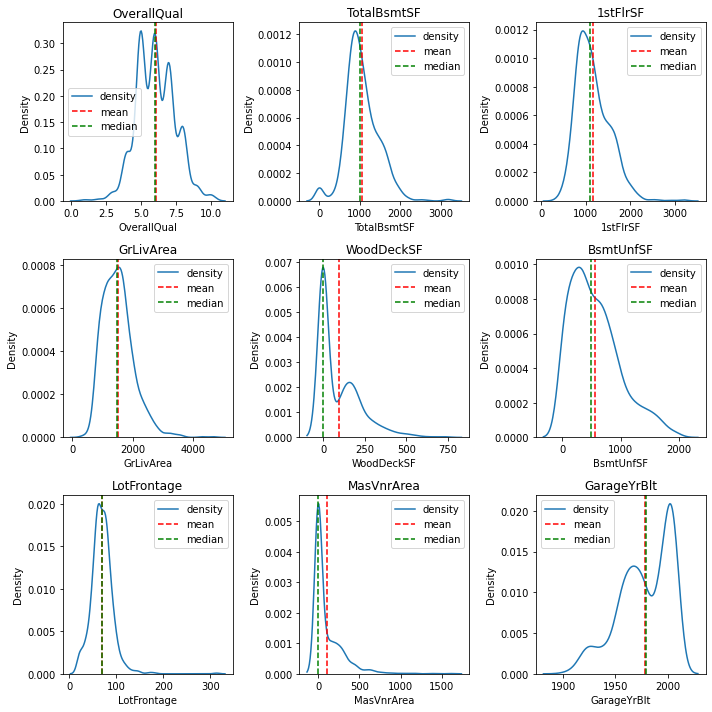

In [9]:
fig, axes = plt.subplots(3,3, figsize=(10, 10))
for i, col in enumerate(cols):
    ax = plt.subplot(3, 3, i+1)
    sns.kdeplot(X_train[col])
    ax.axvline(X_train[col].mean(), color='r', linestyle='--')
    ax.axvline(X_train[col].median(), color='g', linestyle='--')

    ax.legend(['density', 'mean', 'median'])
    ax.set_title(col)

plt.tight_layout()
plt.show()


# Mean/median imputer

In [10]:
# first, check the rows where there is any NaN 
null_idx = X_train[X_train.isnull().any(axis=1)].index
X_train.loc[null_idx]

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
64,7,1057,1057,2034,576,318,NaN,573.0,1998.0
682,6,1291,1291,1291,307,288,NaN,0.0,1996.0
960,5,858,858,858,117,162,50.0,0.0,NaN
853,6,1127,1445,1445,180,563,NaN,115.0,1964.0
1011,5,0,1664,1664,0,0,75.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
537,4,864,864,864,216,264,NaN,0.0,1980.0
705,4,0,372,1092,0,0,70.0,0.0,NaN
1033,7,1654,1654,1654,0,668,NaN,295.0,2002.0
1383,5,816,1416,1416,0,816,NaN,0.0,2007.0


## (1) using Pandas

In [11]:
# 1) fit: find a dictionary taht will be used as an encoder 
d = X_train.mean().to_dict()
d

{'OverallQual': 6.079256360078278,
 'TotalBsmtSF': 1055.3434442270059,
 '1stFlrSF': 1161.7221135029354,
 'GrLivArea': 1522.1379647749511,
 'WoodDeckSF': 94.8522504892368,
 'BsmtUnfSF': 565.9921722113503,
 'LotFrontage': 69.66866746698679,
 'MasVnrArea': 103.55358898721731,
 'GarageYrBlt': 1978.0123966942149}

In [12]:
# 2) transform: fill NaN with mean values 
X_train_filled = X_train.fillna(d)

In [13]:
# 3) check the filled data 
X_train_filled.loc[null_idx].head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
64,7,1057,1057,2034,576,318,69.668667,573.0,1998.000000
682,6,1291,1291,1291,307,288,69.668667,0.0,1996.000000
960,5,858,858,858,117,162,50.000000,0.0,1978.012397
853,6,1127,1445,1445,180,563,69.668667,115.0,1964.000000
1011,5,0,1664,1664,0,0,75.000000,0.0,1978.012397


## (2) using sklearn SimpleImputer

In [14]:
# define imputer
imputer = SimpleImputer(strategy='mean', add_indicator=False)

# 1) fit
imputer.fit(X_train)

# check fitted values
#     Note that SimpleImputer does not save the column name information. 
#     The order of column names should be the same in the train & test & production data. 
imputer.statistics_

array([   6.07925636, 1055.34344423, 1161.7221135 , 1522.13796477,
         94.85225049,  565.99217221,   69.66866747,  103.55358899,
       1978.01239669])

In [15]:
# 2) transform 
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=cols)

In [16]:
# 3) check transformed data 
X_train_imputed.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.668667,573.0,1998.000000
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.668667,0.0,1996.000000
2,5.0,858.0,858.0,858.0,117.0,162.0,50.000000,0.0,1978.012397
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.000000,0.0,1939.000000
4,2.0,290.0,438.0,438.0,0.0,0.0,60.000000,0.0,1930.000000


## (3) Applying mean/median to different columns using ColumnTransformer

In [17]:
# initialize transformer 
ct = ColumnTransformer([('mean', SimpleImputer(strategy='mean'), ['LotFrontage']),
                        ('median', SimpleImputer(strategy='median'), ['GarageYrBlt'])])

# transform data
X_train_inputed = ct.fit_transform(X_train)
pd.DataFrame(X_train_inputed).head()

,0,1
0,69.668667,1998.0
1,69.668667,1996.0
2,50.000000,1979.0
3,60.000000,1939.0
4,60.000000,1930.0


In [18]:
# compare with the original data 
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
64,7,1057,1057,2034,576,318,NaN,573.0,1998.0
682,6,1291,1291,1291,307,288,NaN,0.0,1996.0
960,5,858,858,858,117,162,50.0,0.0,NaN
1384,6,560,698,1258,0,356,60.0,0.0,1939.0
1100,2,290,438,438,0,0,60.0,0.0,1930.0


In [19]:
print(f"LotFrontage mean: {X_train['LotFrontage'].mean()}, median: {X_train['LotFrontage'].median()}")
print(f"GarageYrBlt mean: {X_train['GarageYrBlt'].mean()}, median: {X_train['GarageYrBlt'].median()}")

LotFrontage mean: 69.66866746698679, median: 69.0
GarageYrBlt mean: 1978.0123966942149, median: 1979.0


# Put ColumnTransformer in Pipeline

In [20]:
# define column transformer 
ct = ColumnTransformer([('mean', SimpleImputer(strategy='mean'), [0, 1, 2, 3]),  # apply mean to 0-3 columns
                        ('median', SimpleImputer(strategy='median'), [4, 5, 6, 7, 8])])  # apply medain to the rest

# define pipeline: do missing data imputation, and then train a linear regression model 
pipe = Pipeline([('missing_imputer', ct),
                ('LR', LinearRegression())])

# Fit all the transformers, then fit the transformed data using the final estimator.
pipe.fit(X_train, y_train)

Pipeline(steps=[('missing_imputer',
                 ColumnTransformer(transformers=[('mean', SimpleImputer(),
                                                  [0, 1, 2, 3]),
                                                 ('median',
                                                  SimpleImputer(strategy='median'),
                                                  [4, 5, 6, 7, 8])])),
                ('LR', LinearRegression())])

In [21]:
pipe.predict(X_train)

array([270117.338112  , 194010.50022832, 113437.46070577, ...,
       160462.00336547, 208250.36540993, 206701.11630521])

In [22]:
pipe.score(X_train, y_train)

0.8095177076529523

# Compare original distribution vs. transformed distribution

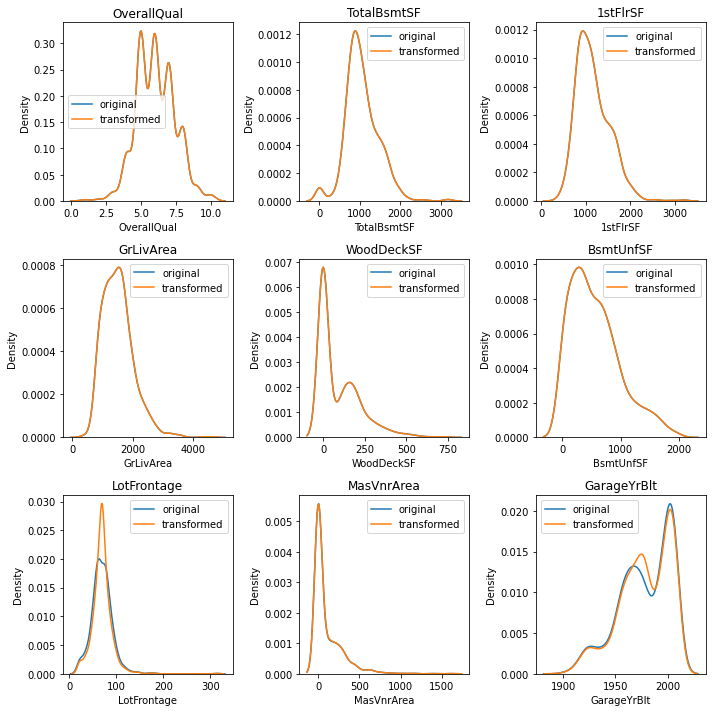

In [23]:
fig, axes = plt.subplots(3,3, figsize=(10, 10))
for i, col in enumerate(cols):
    ax = plt.subplot(3, 3, i+1)
    sns.kdeplot(X_train[col])
    sns.kdeplot(X_train_filled[col])

    ax.legend(['original', 'transformed'])
    ax.set_title(col)
    
plt.tight_layout()
plt.show()
